In [22]:
import katdal
import numpy as np
import pickle

In [23]:
import time

In [24]:
np.set_printoptions(precision=1,suppress=True)

In [25]:
def target(h):
    h.catalogue.remove('Nothing')
    if len(h.catalogue) >0 :
        tgt=str(h.catalogue.targets[0])[0:12]
    else:
        tgt="Nothing:Bad DATA"
    return tgt

In [26]:
def get_ants(h):
    a_list=[]
    aa=h.file['TelescopeState']['cal_antlist']
    for i,ai in enumerate(aa):
        a_list.append(pickle.loads(ai[1]))
    a_array=np.array(a_list)
    labels=a_array[0]
    return labels

In [27]:
def get_ut(f):
    nn=int(f[-13:-3])
    print nn
    ut=time.asctime(time.gmtime(nn))
    return ut

In [28]:
def phases(h):
    g = h.file['TelescopeState']['cal_product_G']
    g_list = []
    for i, gi in enumerate(g):
        g_list.append(pickle.loads(gi[1]))
    g_array = np.array(g_list)
    HH=g_array[:,0,:]
    VV=g_array[:,1,:]
    HHbefore=np.rad2deg(np.angle(HH)[0])
    HHafter=np.rad2deg(np.angle(HH)[-1])
    VVbefore=np.rad2deg(np.angle(VV)[0])
    VVafter=np.rad2deg(np.angle(VV)[-1])
    return HHbefore, HHafter,VVbefore,VVafter

In [29]:
files=['/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480934843.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480936523.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480940003.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480942388.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480945041.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480945624.h5']

In [45]:
Hphases=np.empty([10])
Vphases=np.empty([10])

In [46]:
for f in files:
    h=katdal.open(f)
    p=phases(h)
    print get_ut(f), f[-13:-3], target(h)
    print get_ants(h)
    labels=get_ants(h)
    print p[0],"\n",p[1],"\n\n",p[2],"\n",p[3]
    Hnew=np.vstack((Hphases,p[1]))
    Vnew=np.vstack((Vphases,p[3]))
    Hphases=Hnew
    Vphases=Vnew

1480934843
Mon Dec  5 10:47:23 2016 1480934843 PKS 1934-63 
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']
[  57.4   71.6  120.    69.3  144.2   69.3    0.   -16.   136.4   99.1] 
[  57.    70.5  121.    68.8  144.5   69.4    0.   -15.8  137.1   99.9] 

[  33.9   82.2   62.5   77.1   75.6   45.9   -0.    22.3   65.7  105. ] 
[  33.5   81.    63.6   76.7   75.8   46.     0.    22.4   66.3  105.7]
1480936523
Mon Dec  5 11:15:23 2016 1480936523 PKS 1934-63 
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']
[  57.4   71.6  120.    69.3  144.2   69.3    0.   -16.   136.4   99.1] 
[  63.2   63.9  104.4   62.7  139.4   67.1    0.    -8.4  138.1  102. ] 

[  33.9   82.2   62.5   77.1   75.6   45.9   -0.    22.3   65.7  105. ] 
[  46.3   88.2   71.7   80.3   81.6   60.2    0.    37.5   77.   103.5]
1480940003
Mon Dec  5 12:13:23 2016 1480940003 PKS 1934-63 
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']
[  64.    78.6  121.

In [47]:
labels=get_ants(h)

In [48]:
Hphases[1:]

array([[  57. ,   70.5,  121. ,   68.8,  144.5,   69.4,    0. ,  -15.8,
         137.1,   99.9],
       [  63.2,   63.9,  104.4,   62.7,  139.4,   67.1,    0. ,   -8.4,
         138.1,  102. ],
       [  63.9,   78.9,  120.8,   59.5,  139.5,   75.3,    0. ,   -0.8,
         126.5,   93.6],
       [  72.5,   72.6,  123.7,   75.7,  145. ,   78.7,    0. ,   12.7,
         143. ,  101.1],
       [  56.1,   58.7,  110. ,   56.3,  138.7,   67.9,    0. ,   -1.2,
         128.6,  104.2],
       [  53.2,   71.1,  114.1,   51.3,  131.2,   66. ,    0. ,   -2.6,
         131.1,  102.9]])

In [49]:
Vphases[1:]

array([[  33.5,   81. ,   63.6,   76.7,   75.8,   46. ,    0. ,   22.4,
          66.3,  105.7],
       [  46.3,   88.2,   71.7,   80.3,   81.6,   60.2,    0. ,   37.5,
          77. ,  103.5],
       [  45.5,   93.3,   77.3,   73.9,   83.4,   64.7,    0. ,   49.4,
          68.7,  107.5],
       [  48.4,   86.4,   88.9,   86.6,   76.7,   57.8,    0. ,   58.7,
          73.5,  109.5],
       [  38.1,   75.6,   80.7,   78.6,   89.5,   54.3,    0. ,   50.6,
          66.3,   98.1],
       [  43.5,   86.3,   74.9,   69.2,   70.6,   51.1,    0. ,   44.2,
          65.8,  102.7]])

In [50]:
import matplotlib.pylab as plt
%matplotlib inline

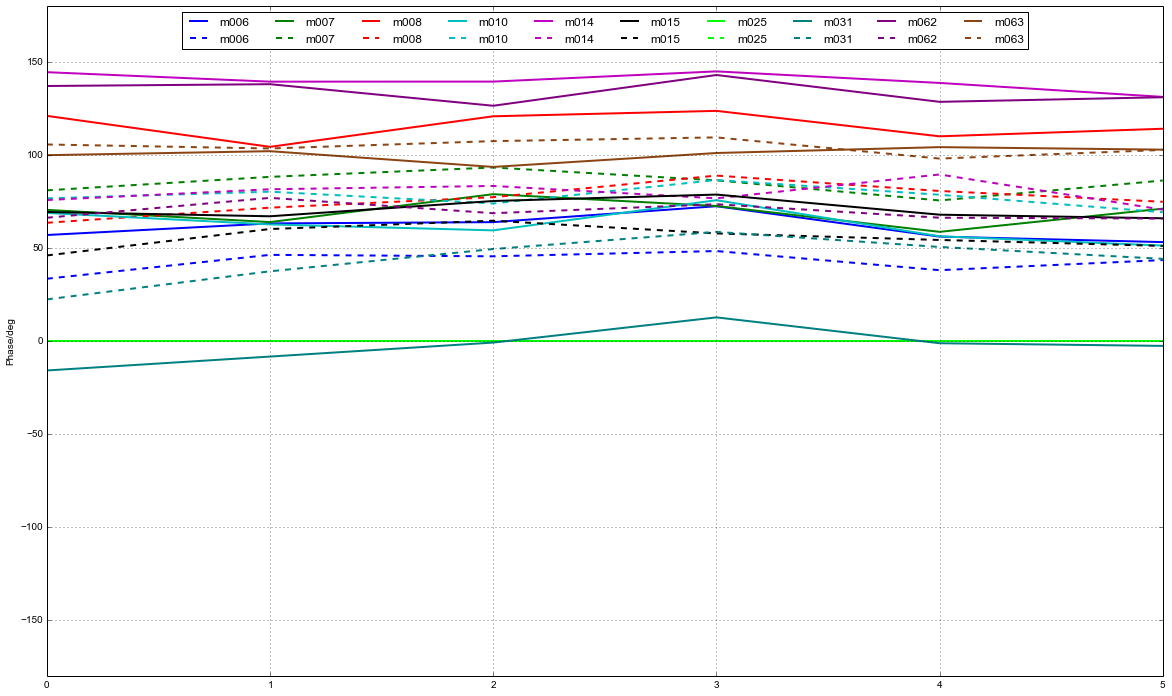

In [51]:
colors=['b','g','r','c','m','k','lime','teal','purple','saddlebrown','grey']
plt.figure(figsize=(20,12))
nants=len(labels)
plt.ylim([-180,180])

for i in range(len(labels)):
    plt.plot(Hphases[1:,i], label=labels[i],color=colors[i],linewidth=2)
    plt.plot(Vphases[1:,i], linestyle='--', label=labels[i],color=colors[i],linewidth=2)
plt.ylabel("Phase/deg")
#plt.xlabel("Time Offset/hours")
plt.legend(loc='upper center',ncol=nants)
plt.grid()

# For the 3hrs involved phases are stable to about 20degrees